In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cus_behav = pd.read_excel("CustomerBehaviorData.xlsx")
cus_dem = pd.read_excel("CustomerDemographics.xlsx")
credit_cons = pd.read_excel("CreditConsumptionData.xlsx")

In [4]:
df = pd.merge(credit_cons, cus_behav, on = 'ID')
df = pd.merge(df, cus_dem, on = "ID")

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [6]:
df.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [7]:
df = df.dropna()

In [8]:
df.shape

(14995, 49)

In [9]:
x = df.drop(columns = ['cc_cons', 'ID'], axis = 1) #drop kolom id 
y = df['cc_cons']

print(x.shape)
print(y.shape)

(14995, 47)
(14995,)


#### Handling Object Columns (Encoding)

In [10]:
for col in x.columns :
    if x[col].dtype == object:
        print(col)

loan_enq
account_type
gender
Income


In [11]:
x['loan_enq'].unique()

array(['Y'], dtype=object)

In [12]:
x['account_type'].unique()

array(['current', 'saving'], dtype=object)

In [13]:
x['gender'].unique()

array(['M', 'F'], dtype=object)

In [14]:
x['Income'].unique()

array(['MEDIUM', 'HIGH', 'LOW'], dtype=object)

In [15]:
x = x.drop('loan_enq', axis = 1) #Drop loan_enq karena hanya memiliki 1 value saja

label_enc = {
    'account_type' : {'current' : 0, 'saving' : 1},
    'gender' : {'M' : 0, 'F' : 1},
    'Income' : {'MEDIUM' : 1, 'LOW' : 0, 'HIGH' : 2}
}

x = x.replace(label_enc)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 14999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   14995 non-null  float64
 1   dc_cons_apr                   14995 non-null  float64
 2   cc_cons_may                   14995 non-null  float64
 3   dc_cons_may                   14995 non-null  float64
 4   cc_cons_jun                   14995 non-null  float64
 5   dc_cons_jun                   14995 non-null  float64
 6   cc_count_apr                  14995 non-null  float64
 7   cc_count_may                  14995 non-null  int64  
 8   cc_count_jun                  14995 non-null  int64  
 9   dc_count_apr                  14995 non-null  int64  
 10  dc_count_may                  14995 non-null  int64  
 11  dc_count_jun                  14995 non-null  int64  
 12  card_lim                      14995 non-null  int64  
 13  p

### Univariate Analysis

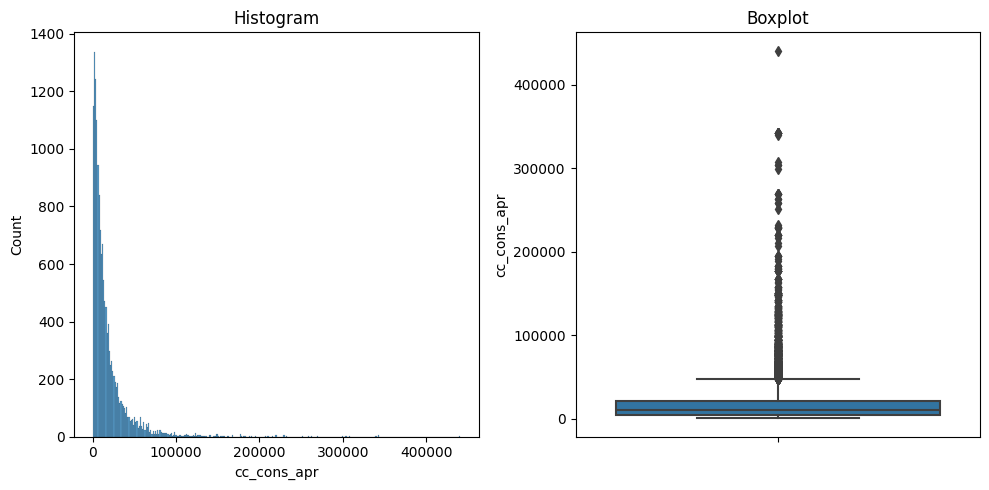

Columns : cc_cons_apr
Skewness: 4.838001706310772
Kurtosis: 39.77043619355247
p - value : 0.0
Data is NOT normally distributed


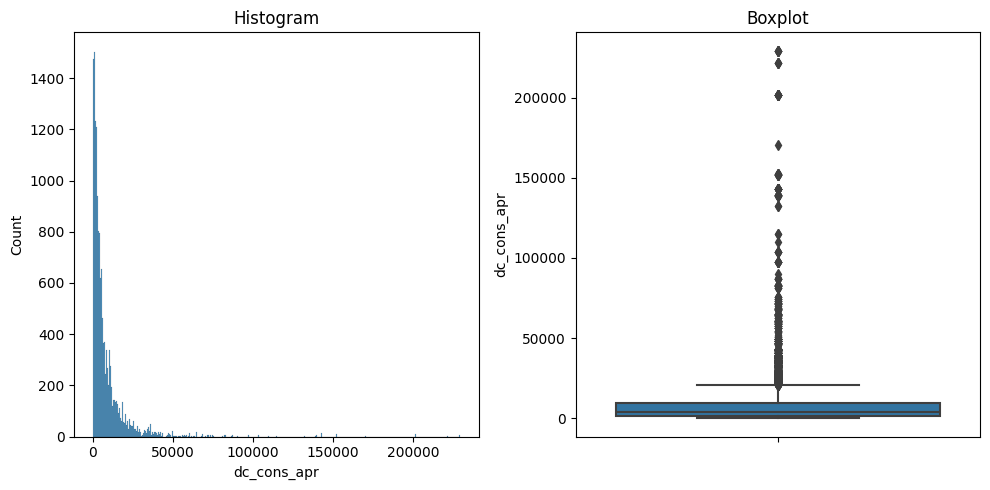

Columns : dc_cons_apr
Skewness: 7.134830211402118
Kurtosis: 75.73195020162665
p - value : 0.0
Data is NOT normally distributed


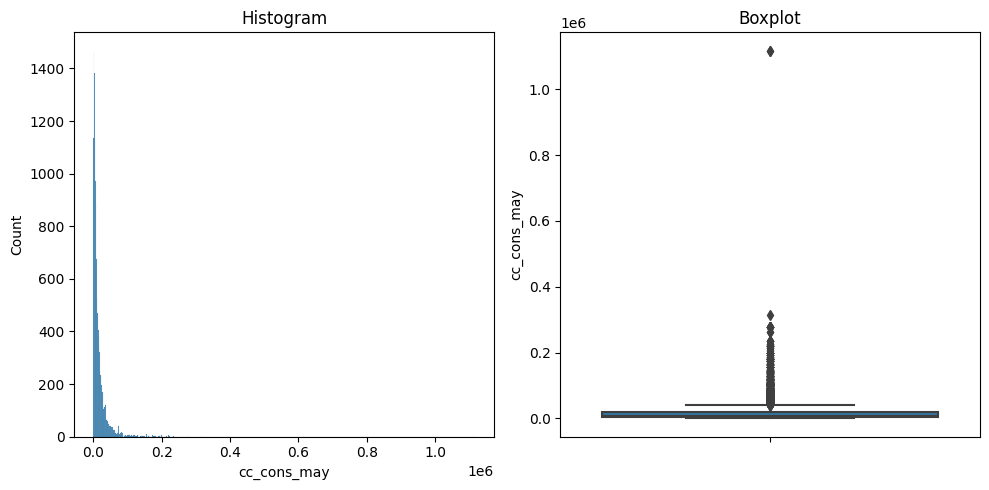

Columns : cc_cons_may
Skewness: 12.055246857261366
Kurtosis: 381.99425062718825
p - value : 0.0
Data is NOT normally distributed


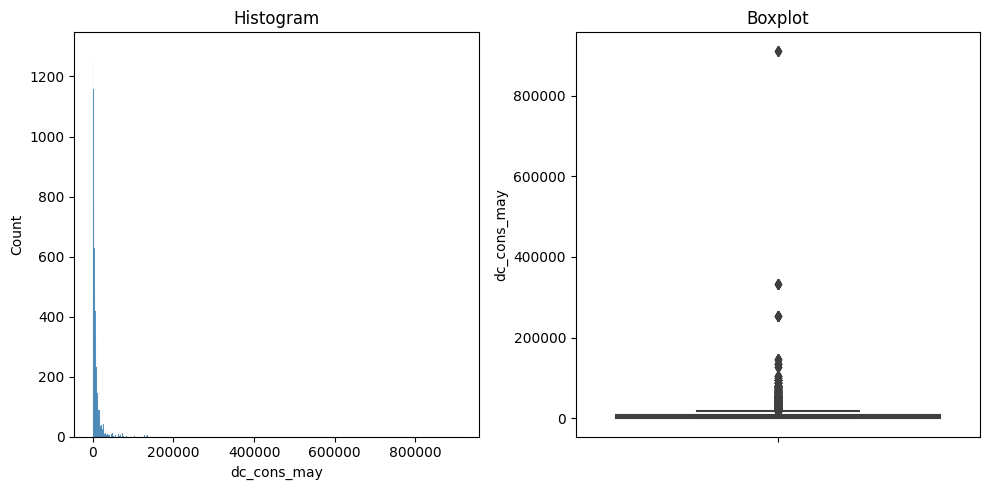

Columns : dc_cons_may
Skewness: 25.323356172158352
Kurtosis: 1069.7590919575018
p - value : 0.0
Data is NOT normally distributed


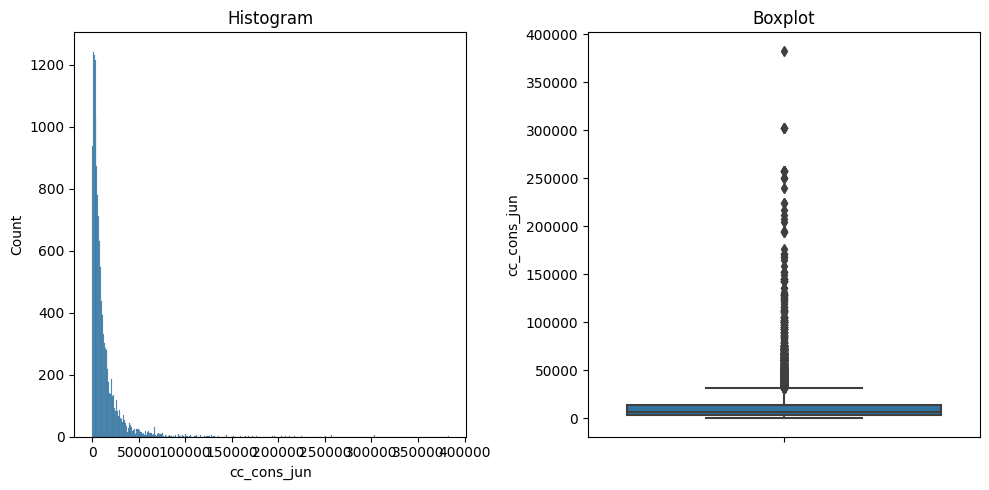

Columns : cc_cons_jun
Skewness: 6.108228579959361
Kurtosis: 63.983738891219936
p - value : 0.0
Data is NOT normally distributed


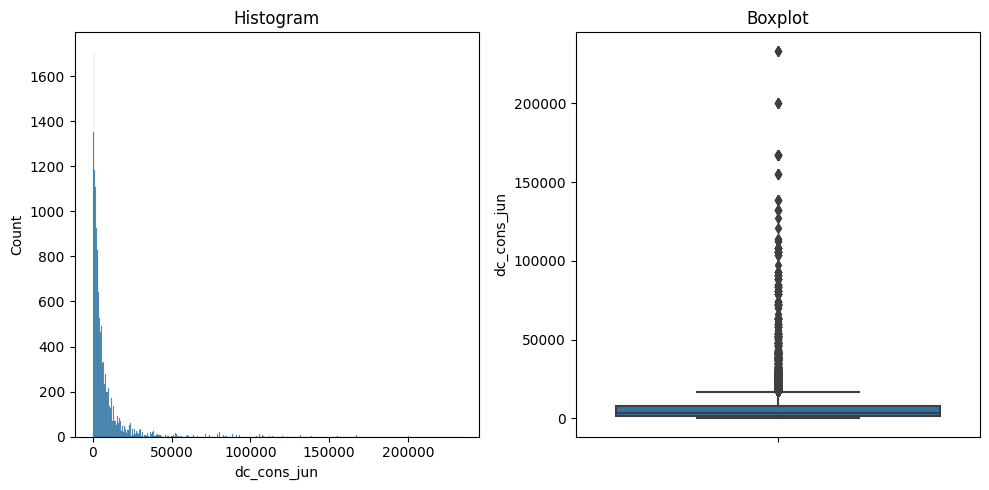

Columns : dc_cons_jun
Skewness: 6.5684869294217165
Kurtosis: 64.6322183797159
p - value : 0.0
Data is NOT normally distributed


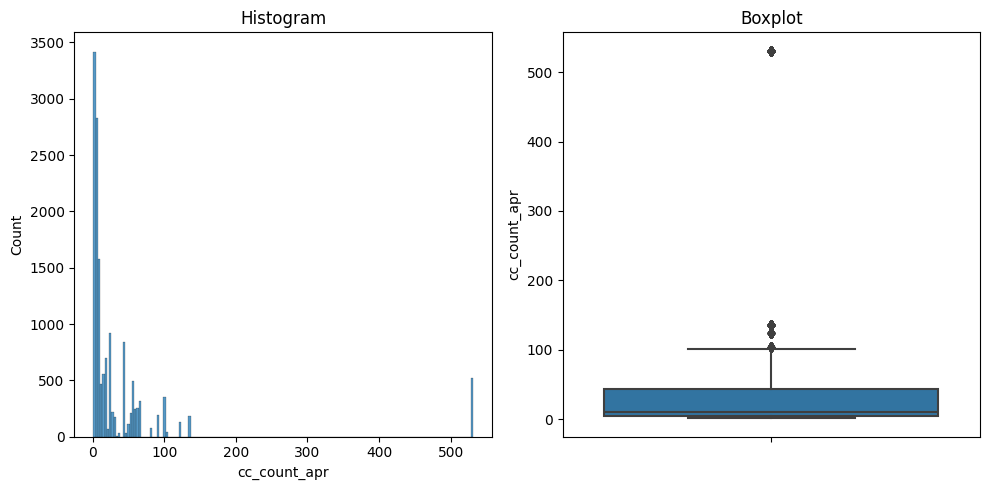

Columns : cc_count_apr
Skewness: 4.416815888816301
Kurtosis: 19.24929390217318
p - value : 0.0
Data is NOT normally distributed


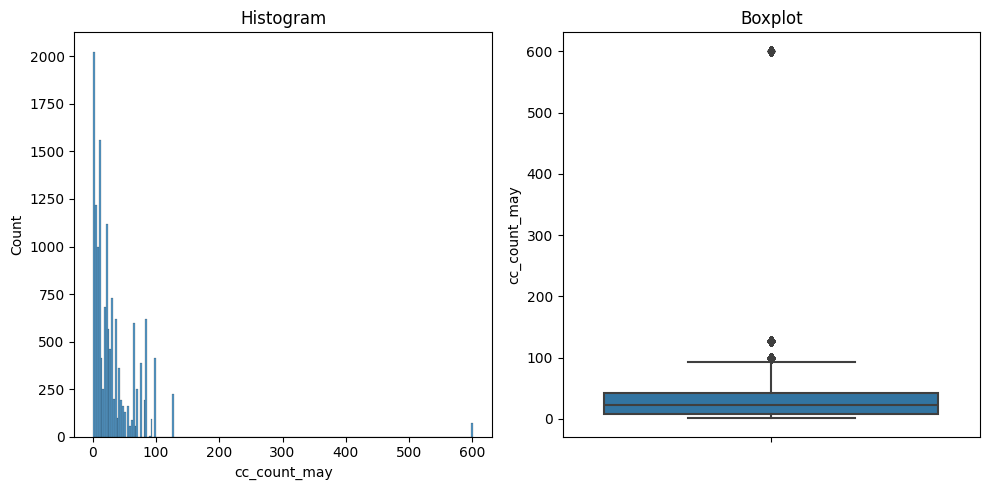

Columns : cc_count_may
Skewness: 7.5179749778127
Kurtosis: 81.25299627005349
p - value : 0.0
Data is NOT normally distributed


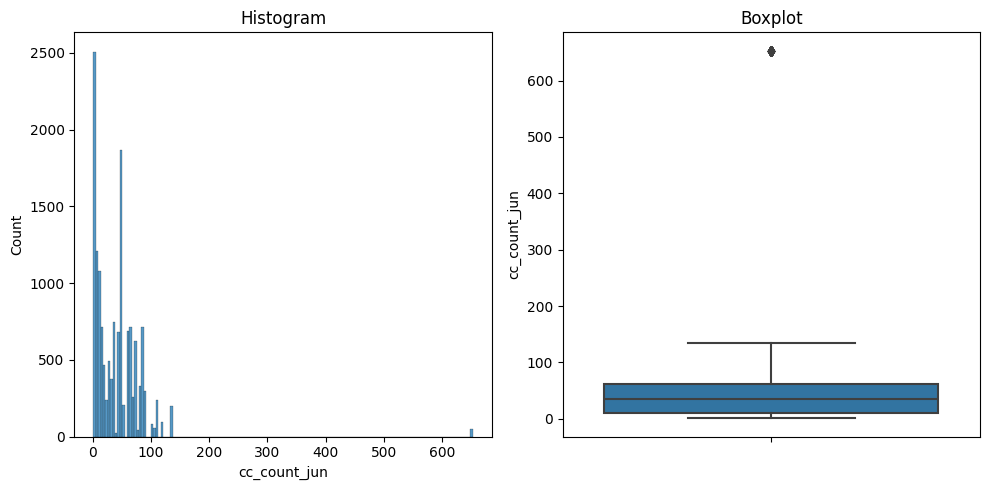

Columns : cc_count_jun
Skewness: 7.1915014495505405
Kurtosis: 88.50404047876101
p - value : 0.0
Data is NOT normally distributed


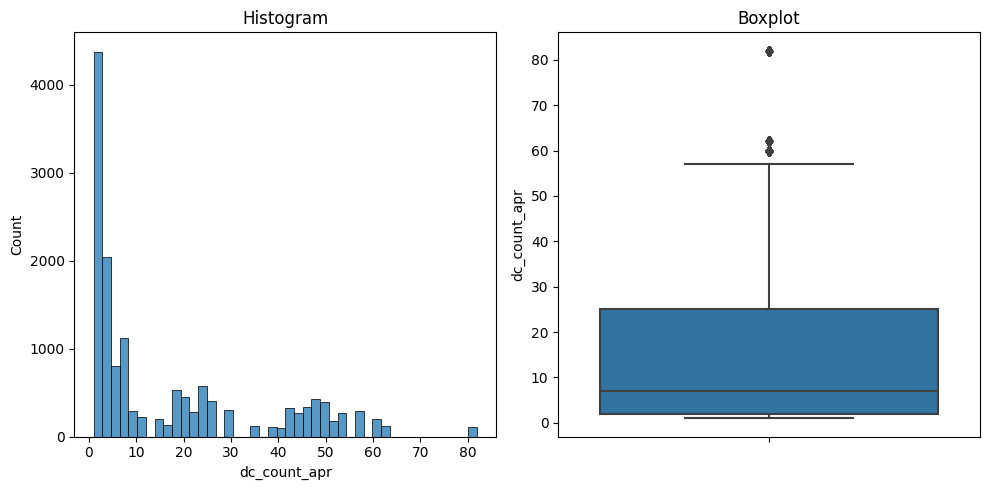

Columns : dc_count_apr
Skewness: 1.1030856547455155
Kurtosis: 0.033830800434678565
p - value : 0.0
Data is NOT normally distributed


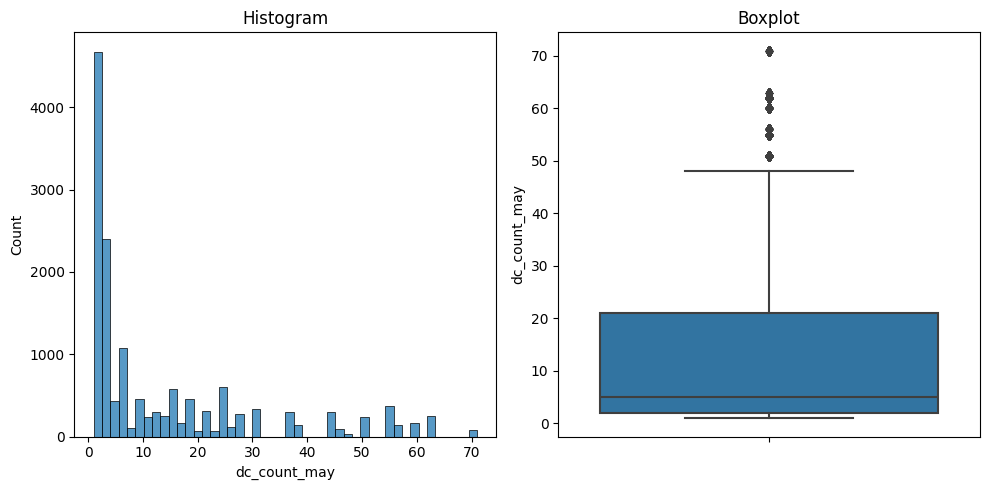

Columns : dc_count_may
Skewness: 1.525904943712181
Kurtosis: 1.3213307842412316
p - value : 0.0
Data is NOT normally distributed


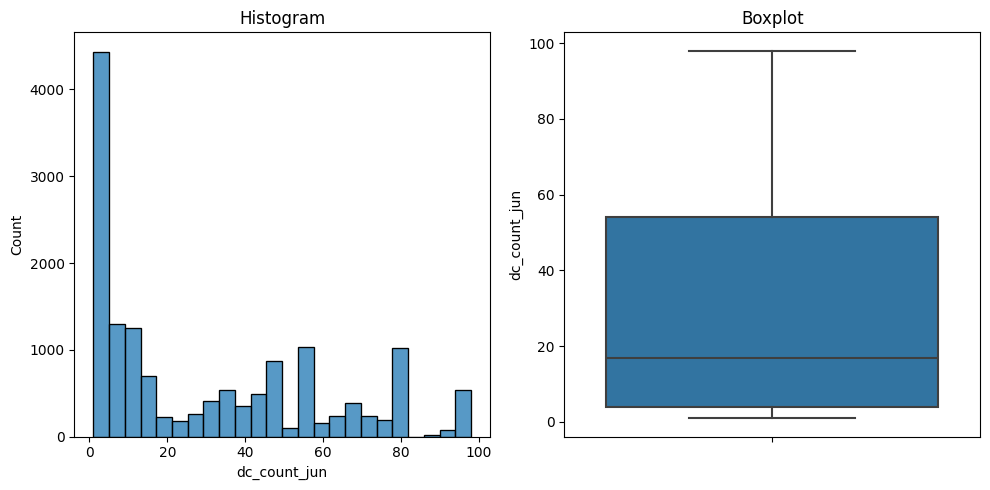

Columns : dc_count_jun
Skewness: 0.733072821886284
Kurtosis: -0.7178130136505096
p - value : 0.0
Data is NOT normally distributed


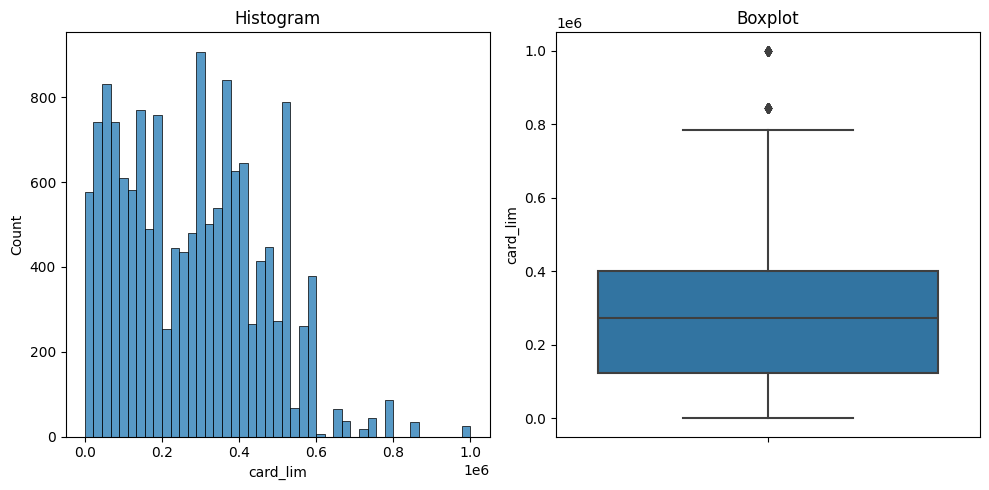

Columns : card_lim
Skewness: 0.4424420629532336
Kurtosis: -0.2780023463019212
p - value : 3.1092129007455714e-112
Data is NOT normally distributed


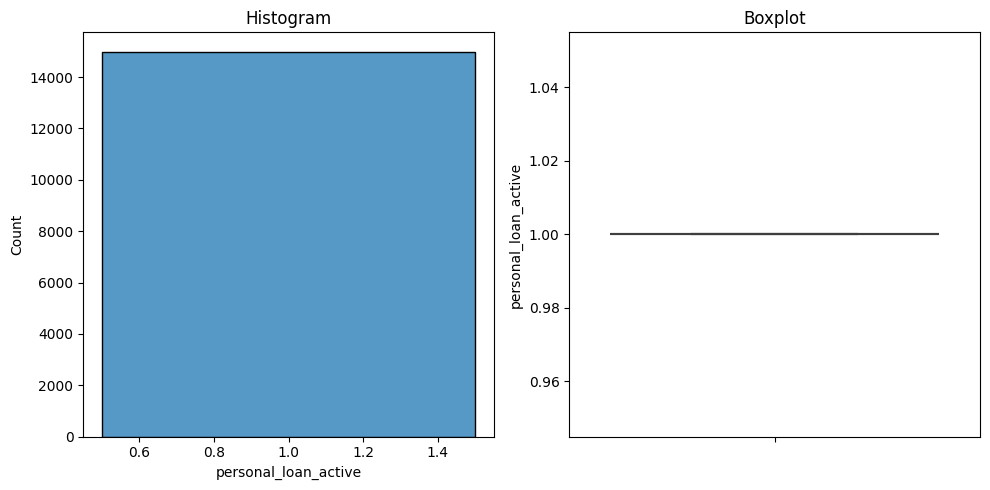

Columns : personal_loan_active
Skewness: 0
Kurtosis: 0
p - value : nan


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


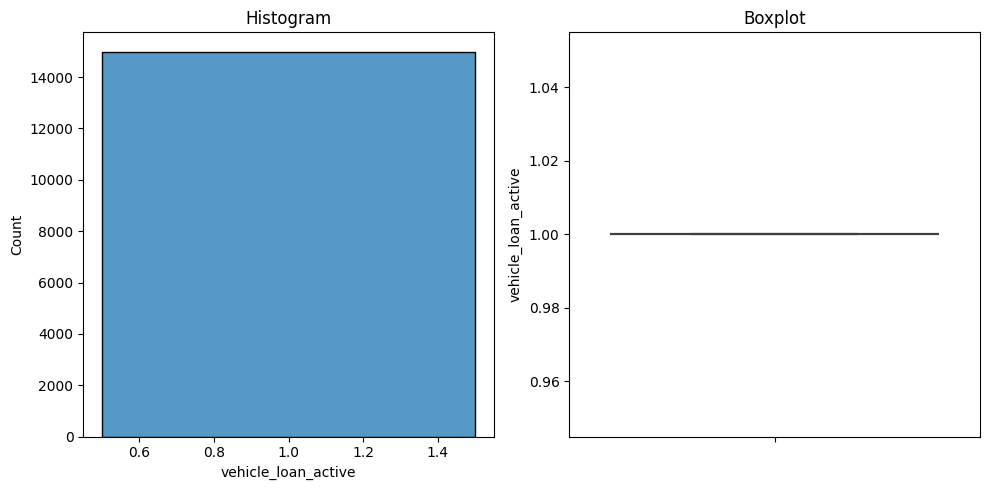

Columns : vehicle_loan_active
Skewness: 0
Kurtosis: 0
p - value : nan


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


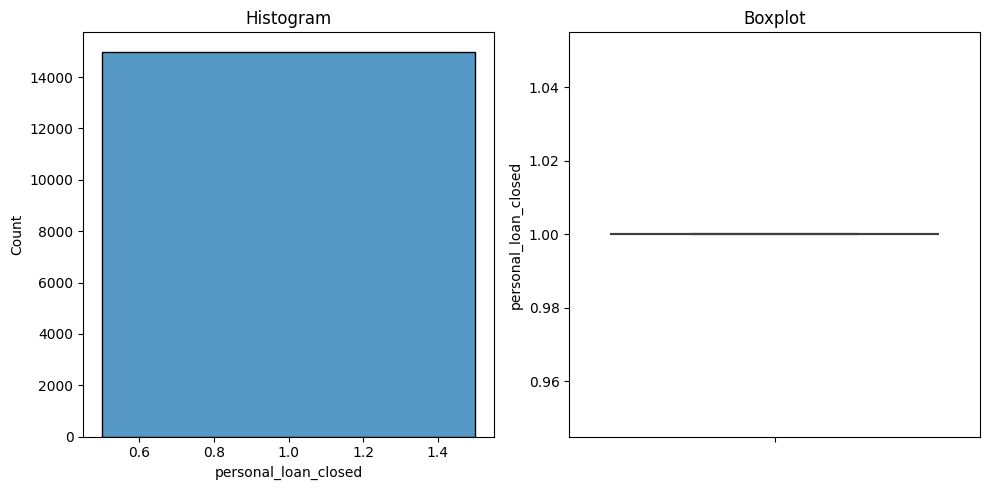

Columns : personal_loan_closed
Skewness: 0
Kurtosis: 0
p - value : nan


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


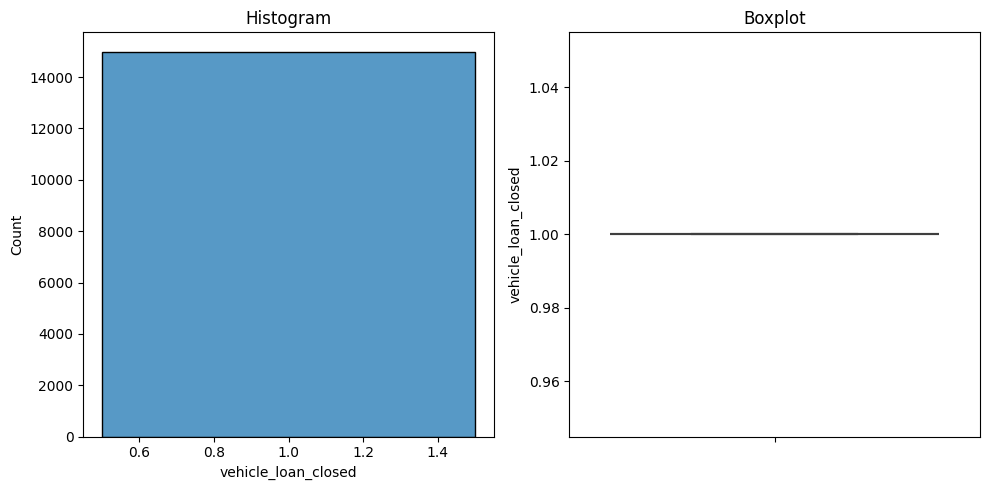

Columns : vehicle_loan_closed
Skewness: 0
Kurtosis: 0
p - value : nan


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


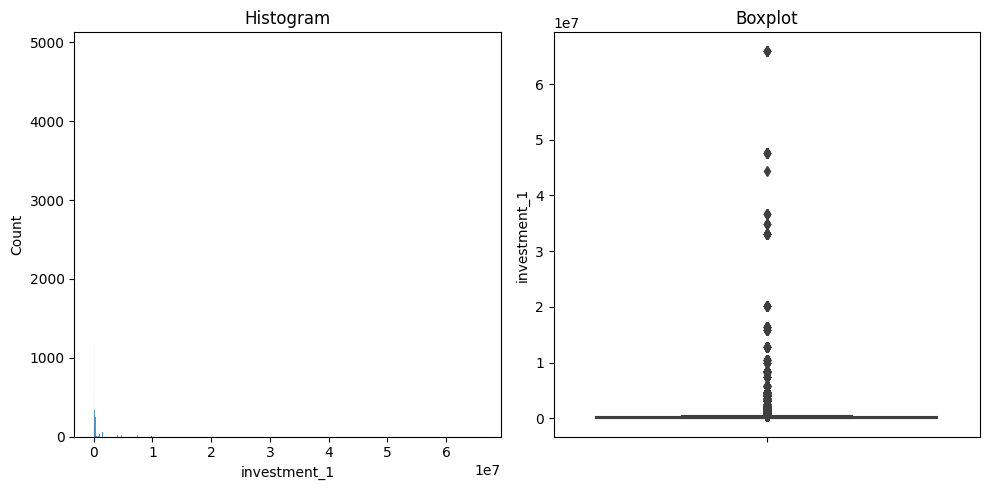

Columns : investment_1
Skewness: 11.602057585590966
Kurtosis: 177.73113502144096
p - value : 0.0
Data is NOT normally distributed


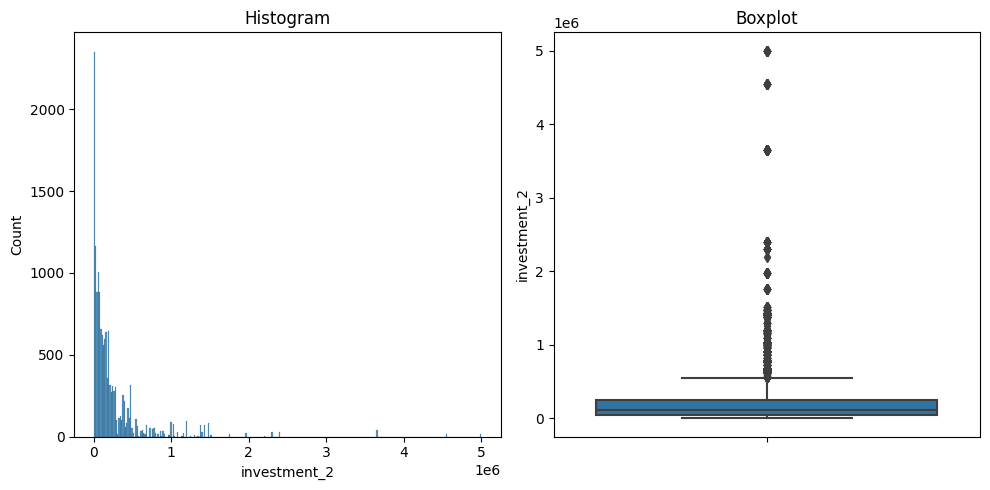

Columns : investment_2
Skewness: 5.474624602474132
Kurtosis: 44.39794863944725
p - value : 0.0
Data is NOT normally distributed


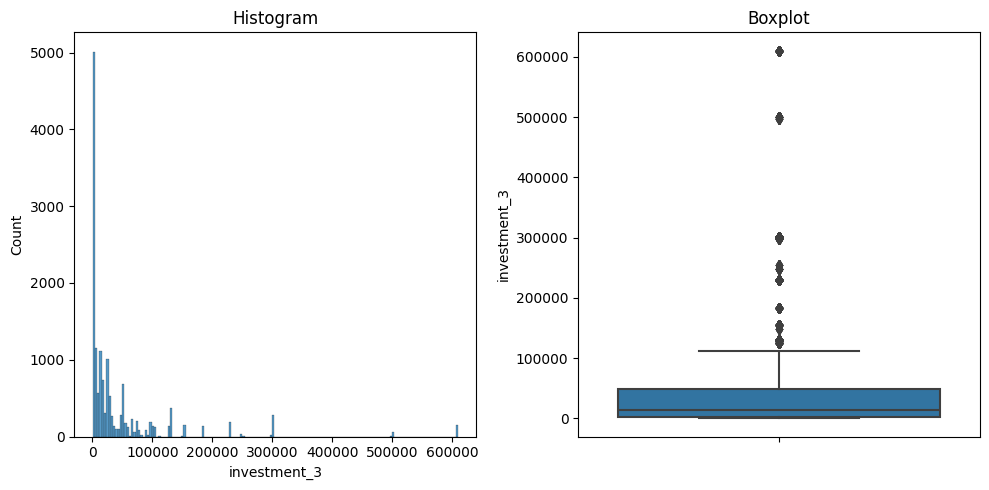

Columns : investment_3
Skewness: 4.075999327571085
Kurtosis: 19.878409724356004
p - value : 0.0
Data is NOT normally distributed


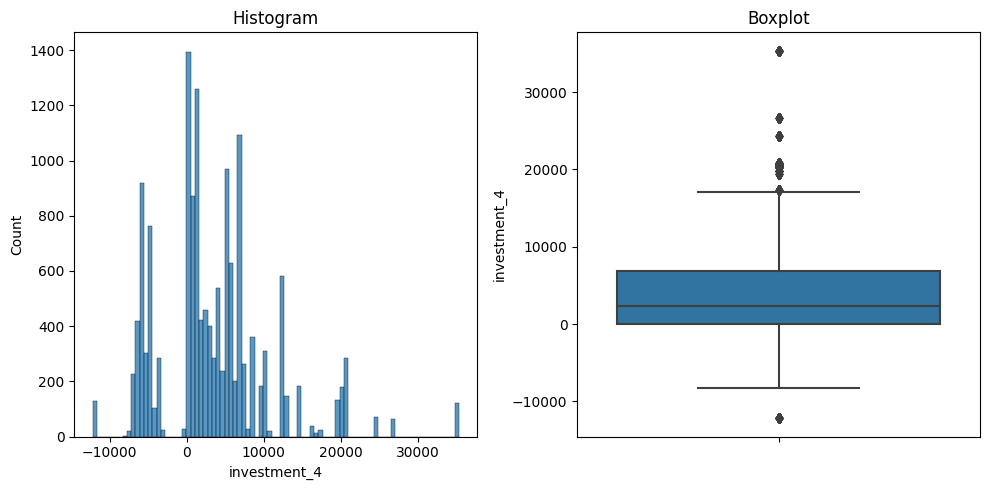

Columns : investment_4
Skewness: 1.084747590366211
Kurtosis: 2.4928844079367733
p - value : 0.0
Data is NOT normally distributed


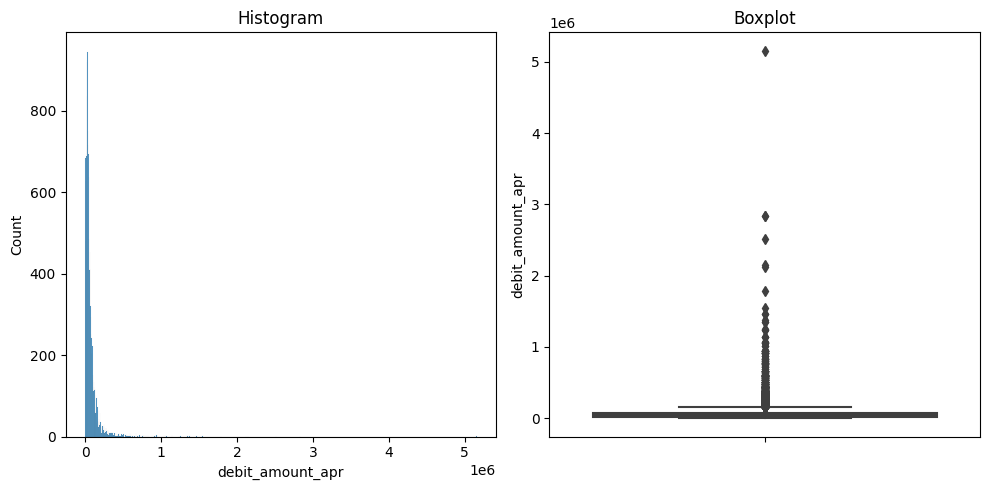

Columns : debit_amount_apr
Skewness: 13.107183282395175
Kurtosis: 381.6094907541276
p - value : 0.0
Data is NOT normally distributed


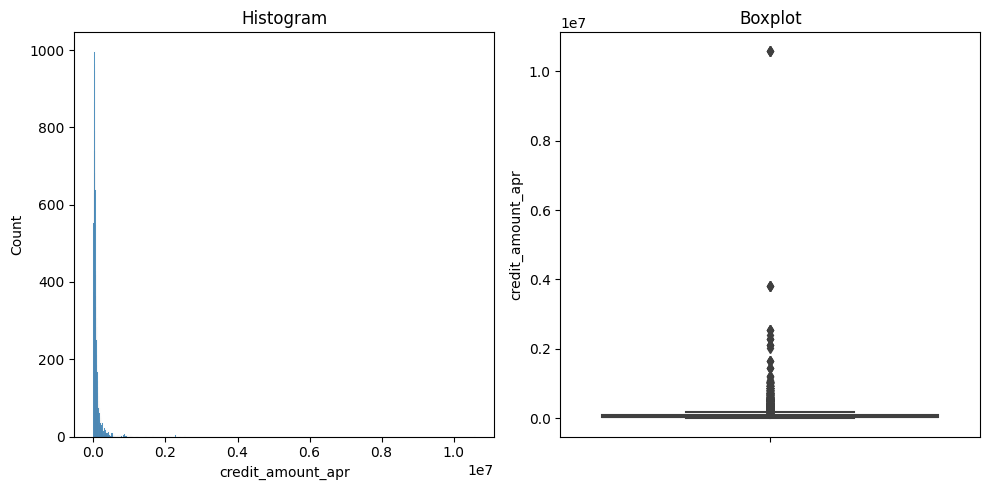

Columns : credit_amount_apr
Skewness: 32.62713842278826
Kurtosis: 1597.0962951380511
p - value : 0.0
Data is NOT normally distributed


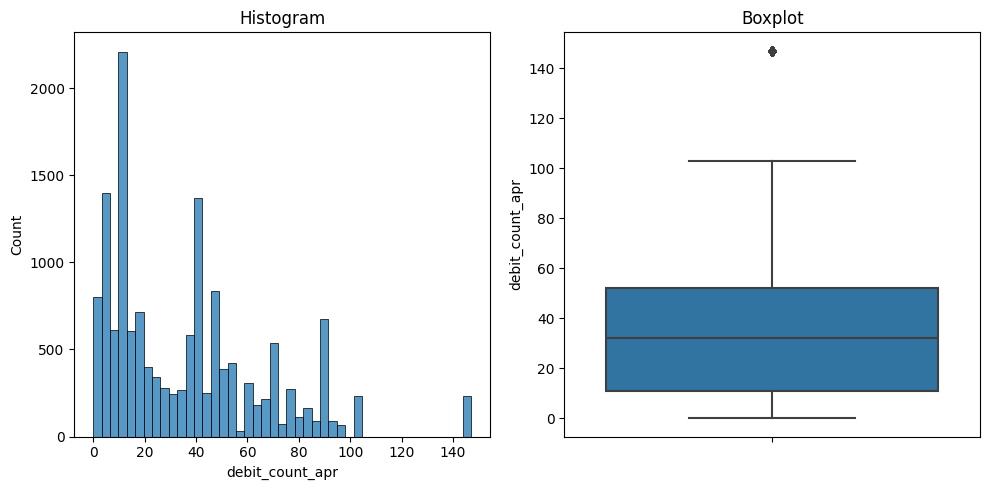

Columns : debit_count_apr
Skewness: 1.0896093590979778
Kurtosis: 1.085219151288821
p - value : 0.0
Data is NOT normally distributed


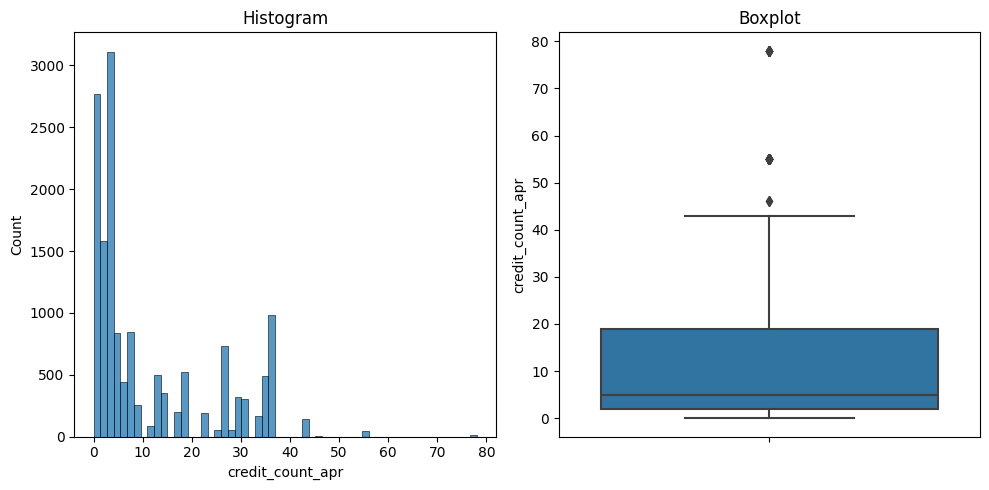

Columns : credit_count_apr
Skewness: 1.1616571678246985
Kurtosis: 0.2168788227072751
p - value : 0.0
Data is NOT normally distributed


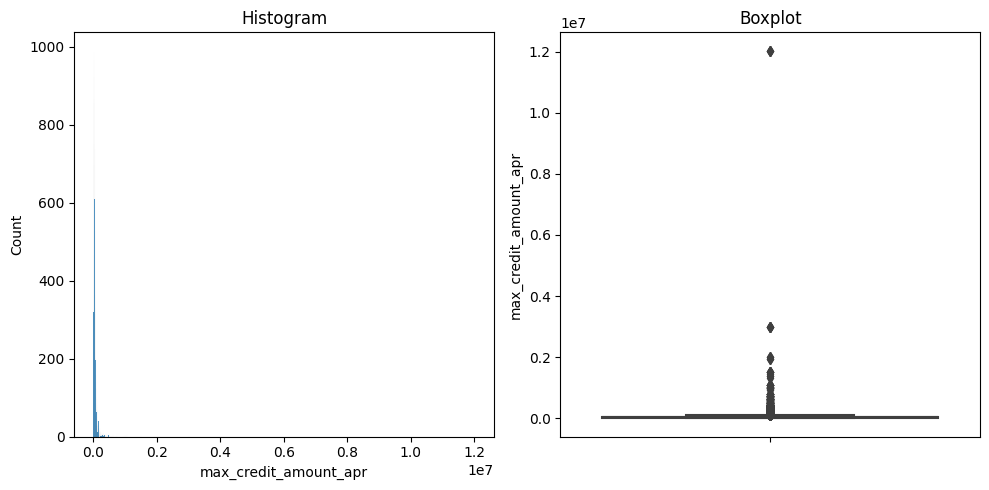

Columns : max_credit_amount_apr
Skewness: 47.944718984458724
Kurtosis: 2855.1835453441695
p - value : 0.0
Data is NOT normally distributed


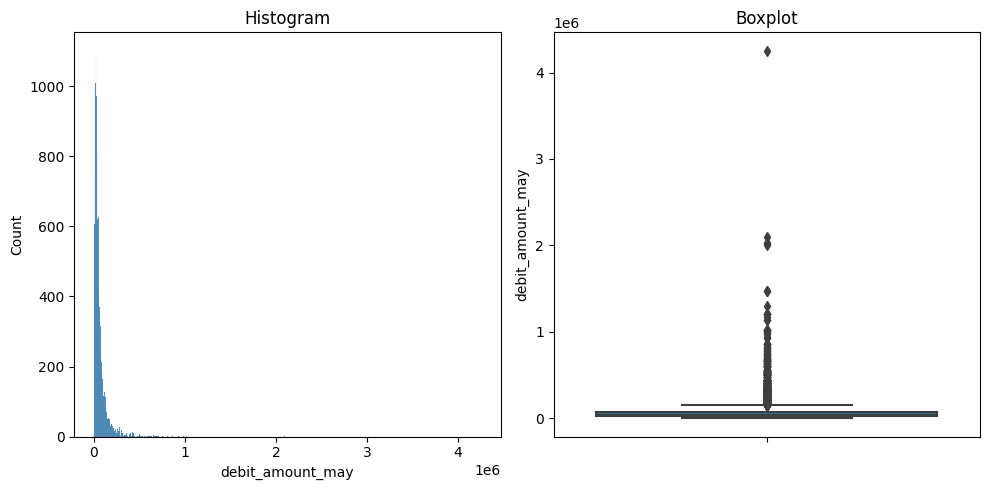

Columns : debit_amount_may
Skewness: 10.296826654773266
Kurtosis: 256.1514834559987
p - value : 0.0
Data is NOT normally distributed


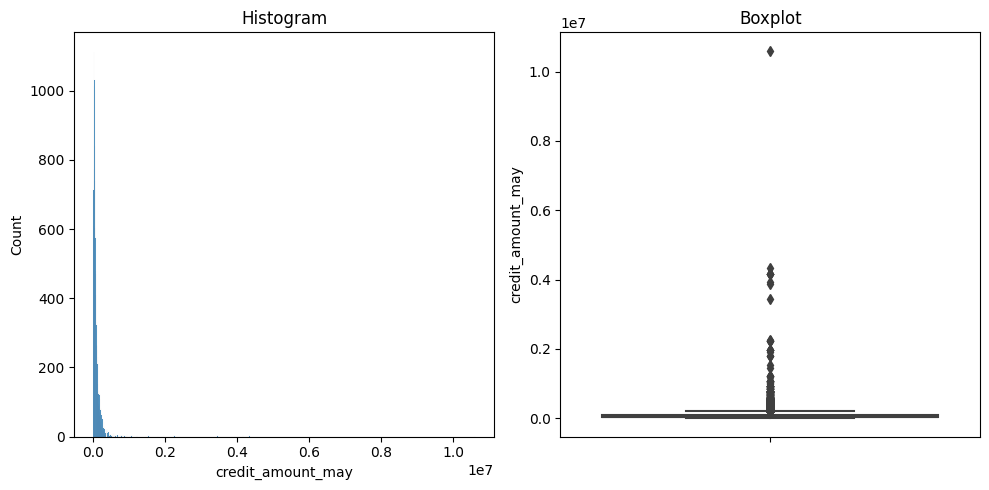

Columns : credit_amount_may
Skewness: 23.38864544282676
Kurtosis: 1003.2254646181145
p - value : 0.0
Data is NOT normally distributed


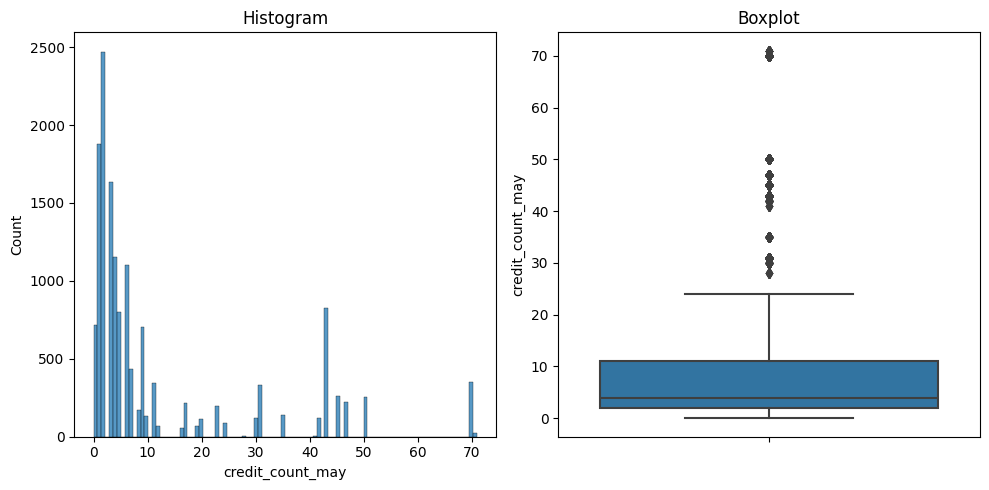

Columns : credit_count_may
Skewness: 1.8337078638280861
Kurtosis: 2.3894474079035097
p - value : 0.0
Data is NOT normally distributed


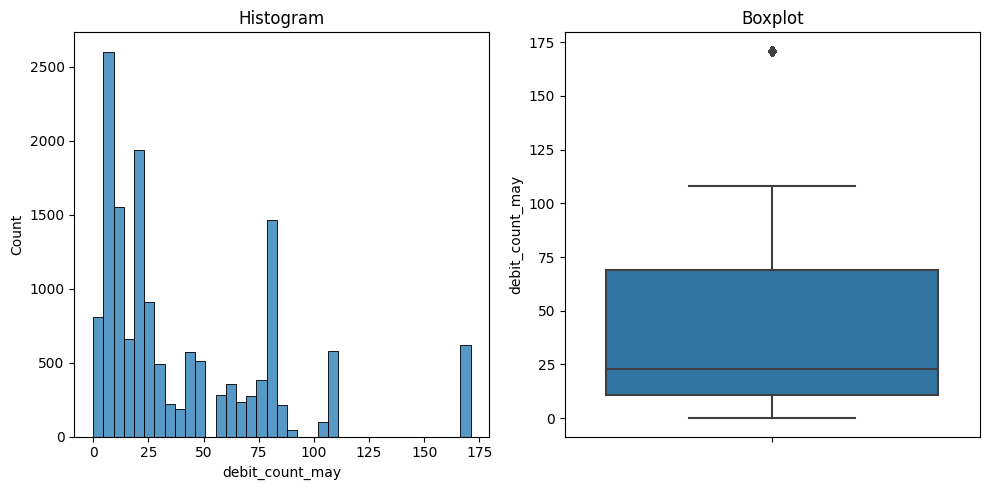

Columns : debit_count_may
Skewness: 1.4930462752090838
Kurtosis: 2.0061840839248433
p - value : 0.0
Data is NOT normally distributed


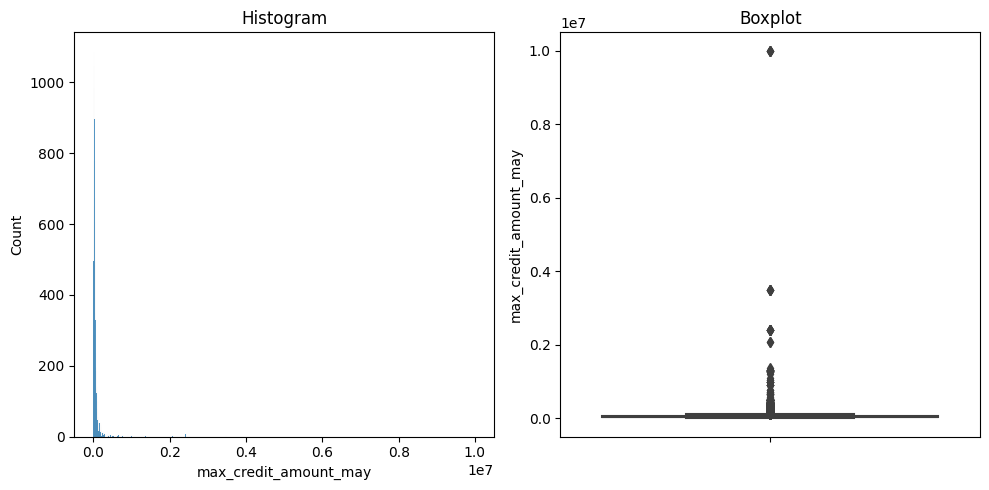

Columns : max_credit_amount_may
Skewness: 35.91795776602078
Kurtosis: 1668.147202594594
p - value : 0.0
Data is NOT normally distributed


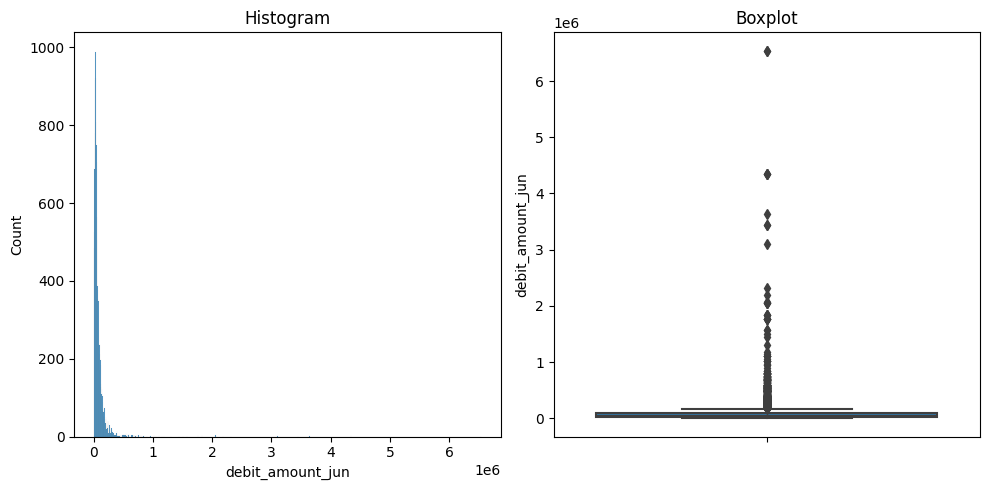

Columns : debit_amount_jun
Skewness: 19.383359161543844
Kurtosis: 606.4917097049009
p - value : 0.0
Data is NOT normally distributed


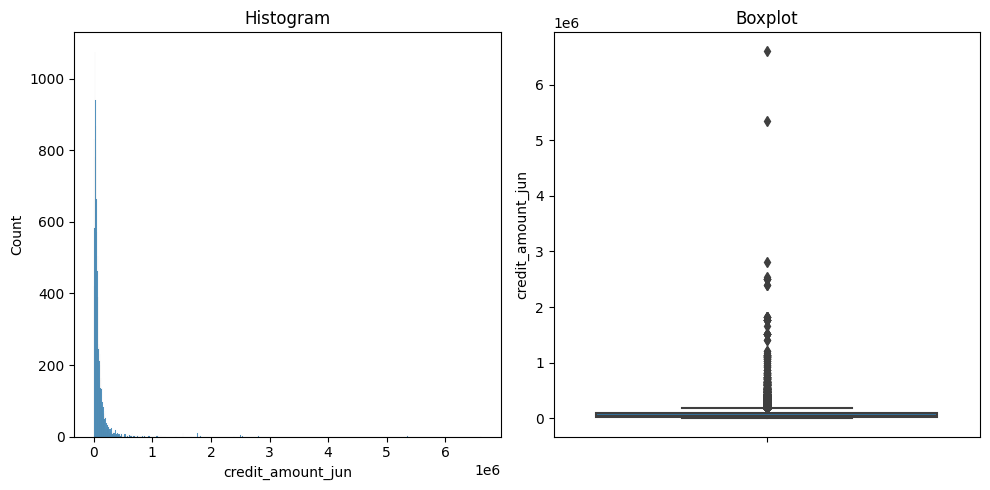

Columns : credit_amount_jun
Skewness: 14.858670594353375
Kurtosis: 431.18565040459913
p - value : 0.0
Data is NOT normally distributed


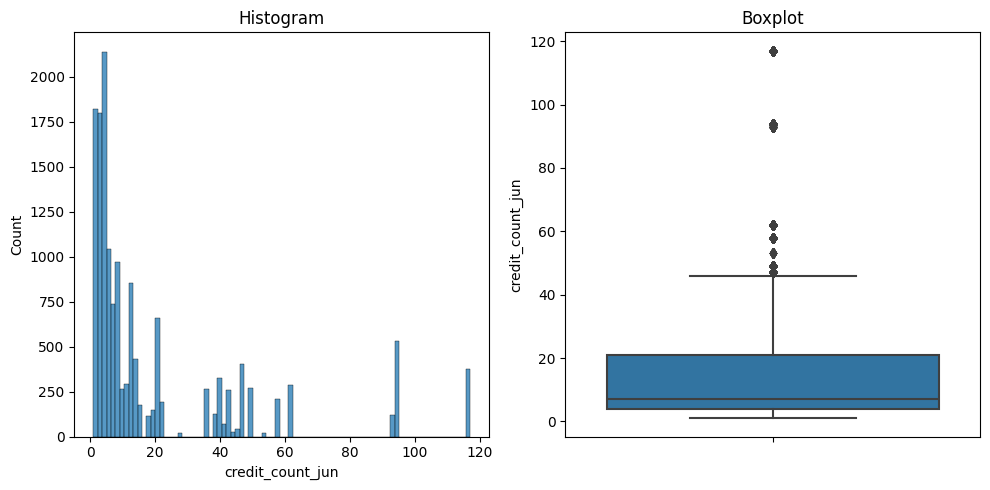

Columns : credit_count_jun
Skewness: 2.0795546066692583
Kurtosis: 3.714573197839573
p - value : 0.0
Data is NOT normally distributed


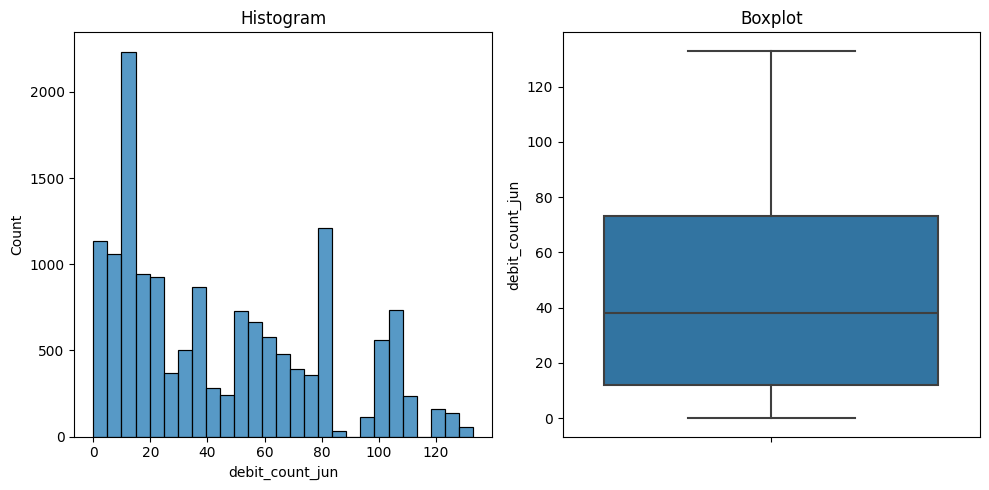

Columns : debit_count_jun
Skewness: 0.5653799239828678
Kurtosis: -0.8677948719734059
p - value : 0.0
Data is NOT normally distributed


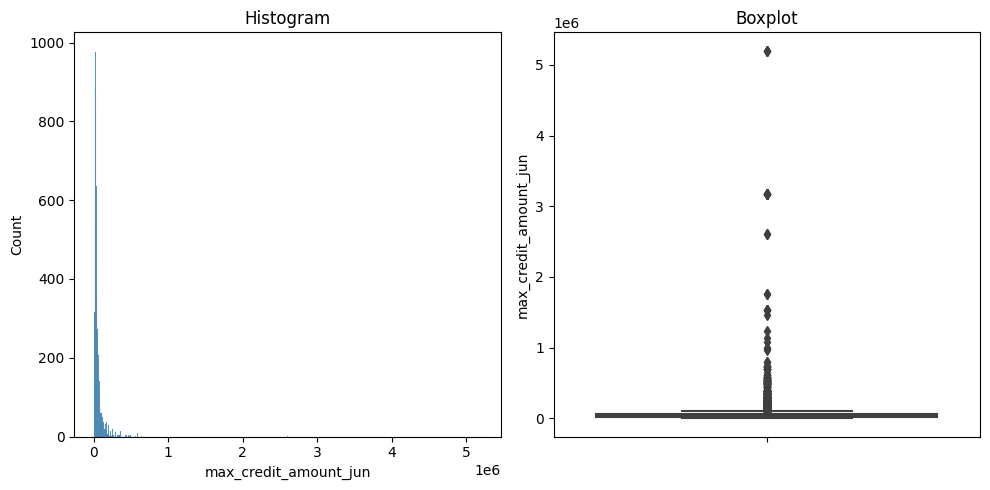

Columns : max_credit_amount_jun
Skewness: 22.34052709148099
Kurtosis: 715.1581270951849
p - value : 0.0
Data is NOT normally distributed


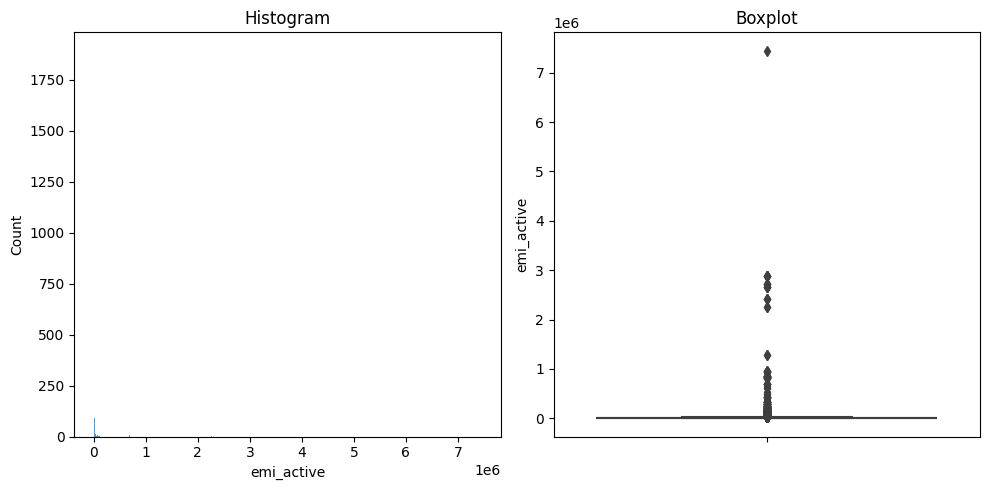

Columns : emi_active
Skewness: 30.389688403191784
Kurtosis: 1344.5356619738711
p - value : 0.0
Data is NOT normally distributed


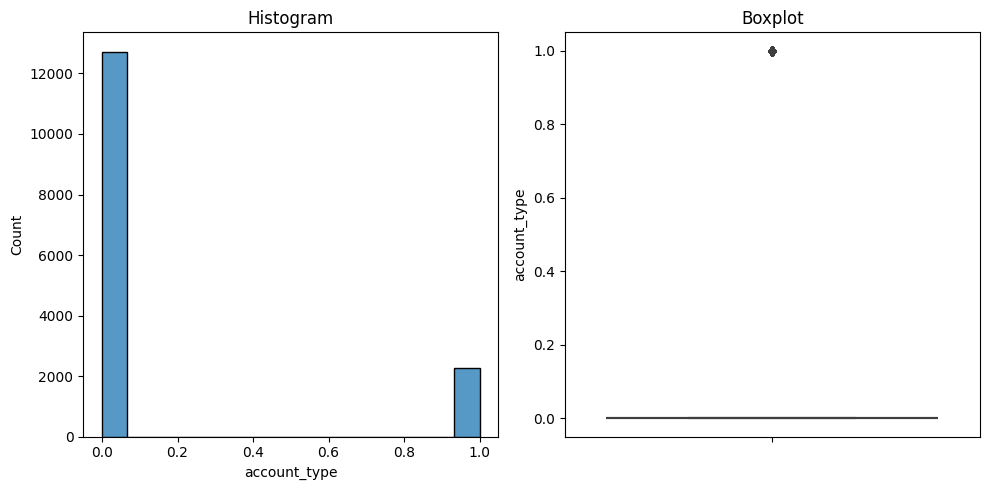

Columns : account_type
Skewness: 1.9433040823492023
Kurtosis: 1.776667706703261
p - value : 0.0
Data is NOT normally distributed


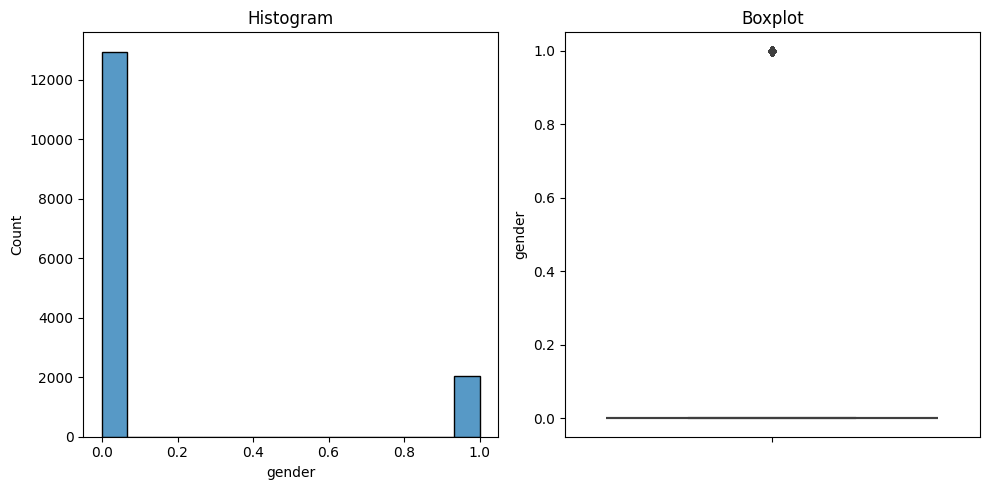

Columns : gender
Skewness: 2.111871707310317
Kurtosis: 2.460330243766867
p - value : 0.0
Data is NOT normally distributed


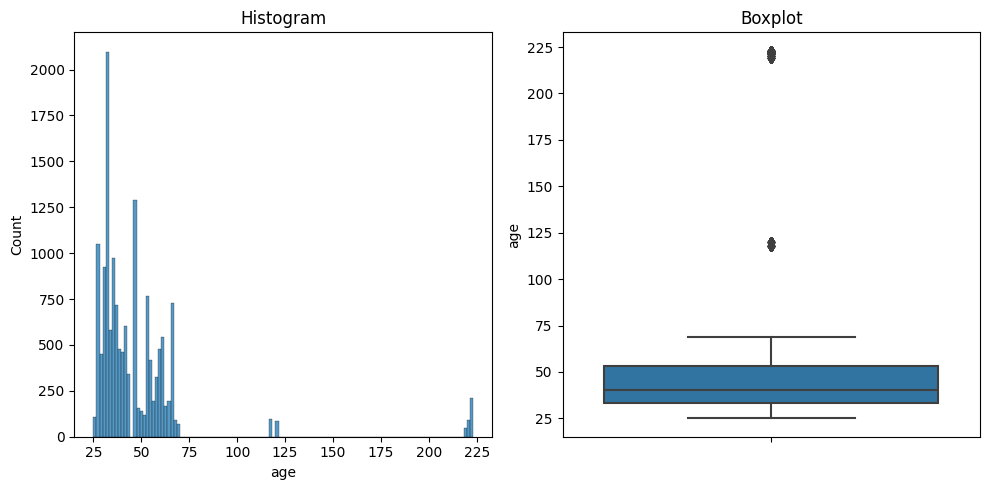

Columns : age
Skewness: 4.385658608362716
Kurtosis: 21.687828068448617
p - value : 0.0
Data is NOT normally distributed


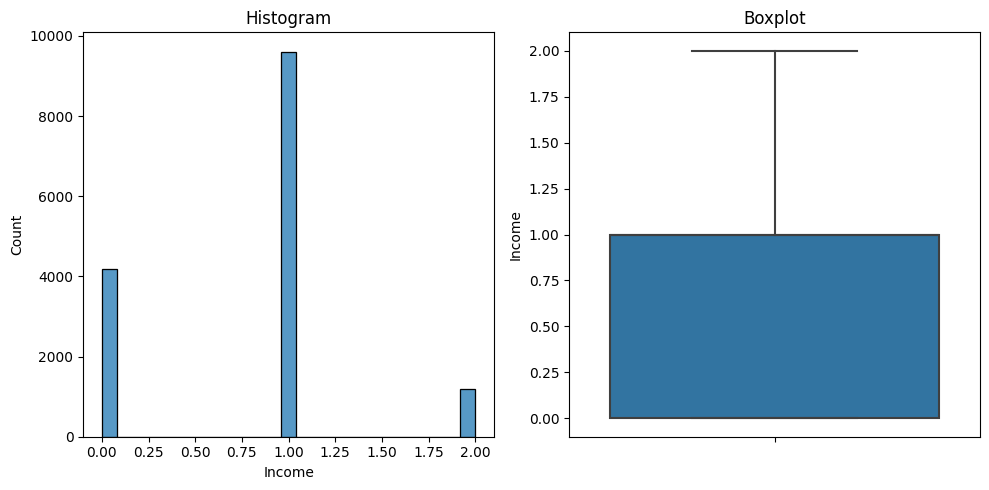

Columns : Income
Skewness: -0.00220903541094161
Kurtosis: -0.2441884591084822
p - value : 3.051111185877429e-11
Data is NOT normally distributed


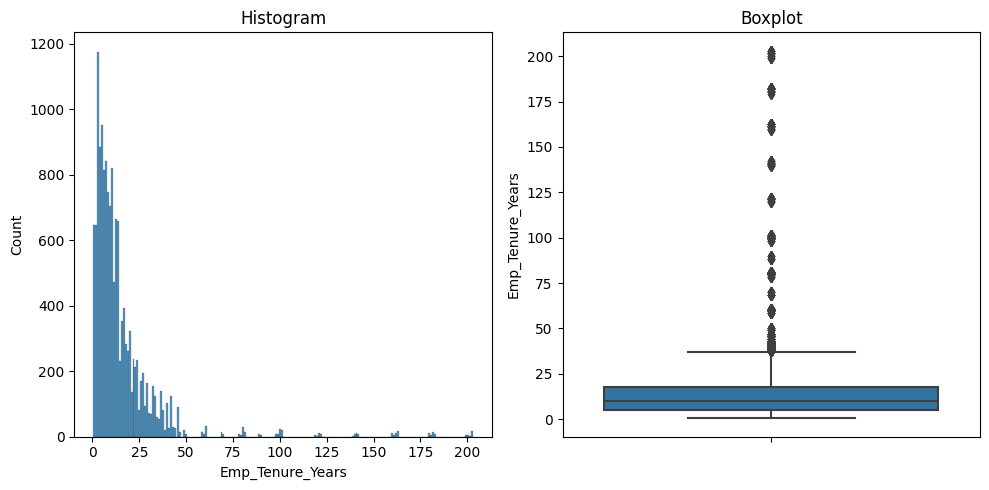

Columns : Emp_Tenure_Years
Skewness: 5.1522701860591535
Kurtosis: 35.30754595671383
p - value : 0.0
Data is NOT normally distributed


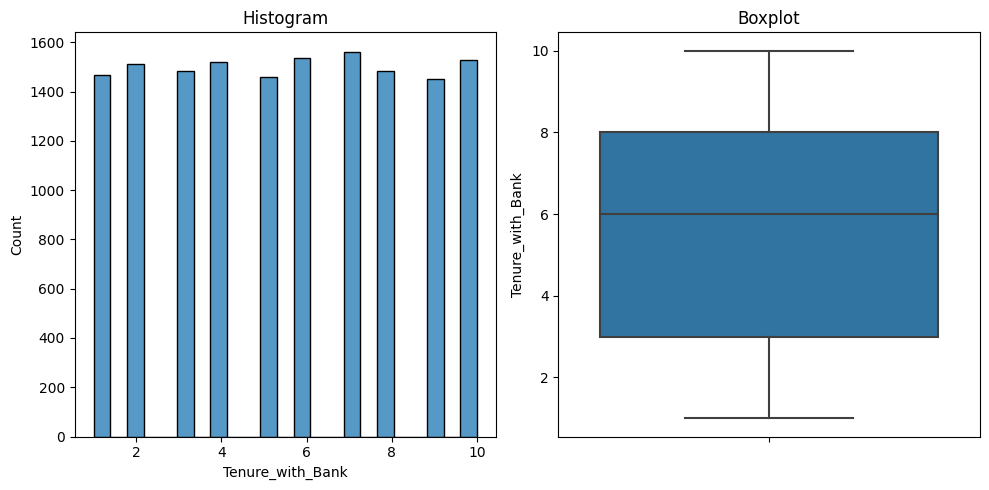

Columns : Tenure_with_Bank
Skewness: -0.0029149774746857235
Kurtosis: -1.2161040105746561
p - value : 0.0
Data is NOT normally distributed


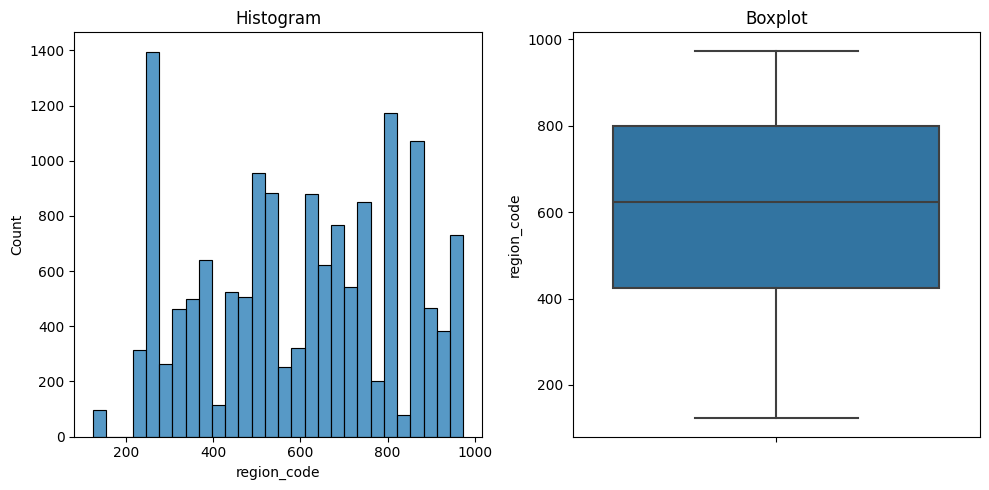

Columns : region_code
Skewness: -0.11831636563309626
Kurtosis: -1.1016980525013
p - value : 0.0
Data is NOT normally distributed


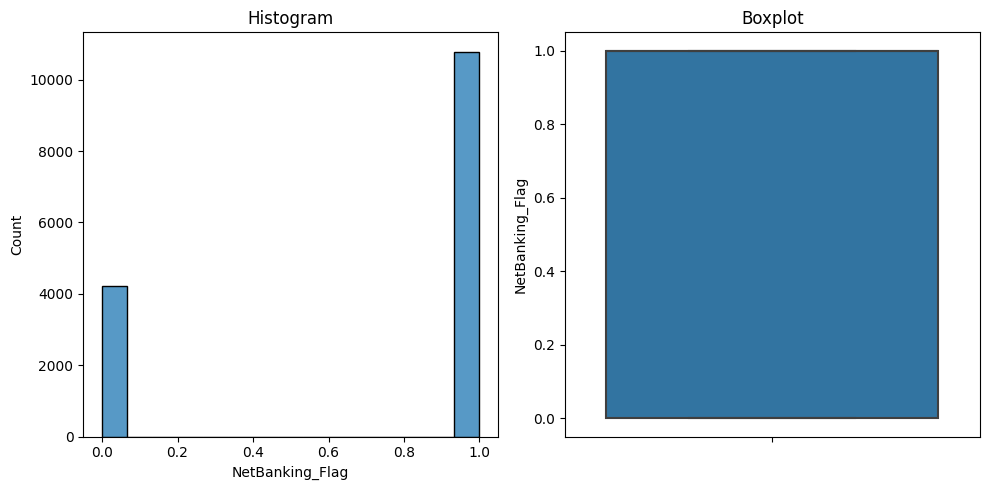

Columns : NetBanking_Flag
Skewness: -0.9773318940475949
Kurtosis: -1.044961761362482
p - value : 0.0
Data is NOT normally distributed


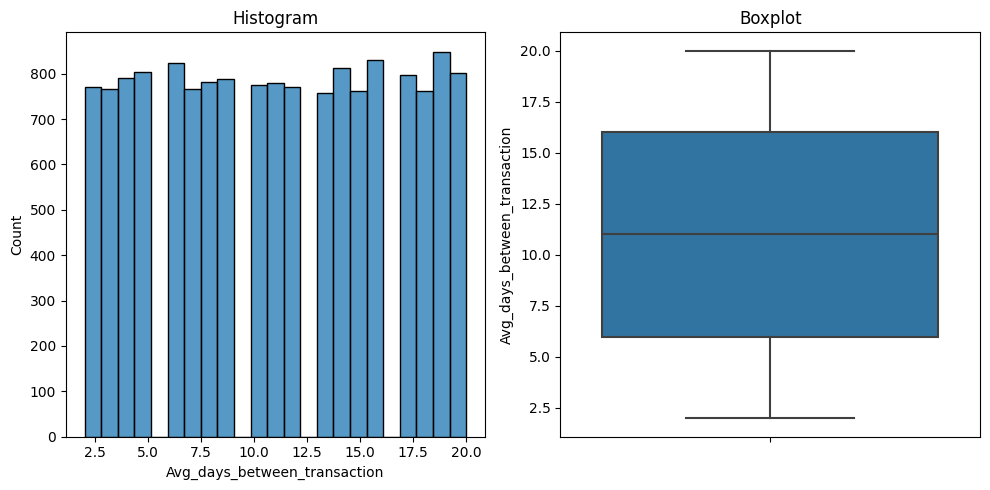

Columns : Avg_days_between_transaction
Skewness: -0.0047952073265106684
Kurtosis: -1.218313444828159
p - value : 0.0
Data is NOT normally distributed


In [16]:
from scipy.stats import normaltest #Pakai normaltest buat large dataset sample > 5000

for col in x.columns:
    plt.figure(figsize = (10,5))
    
    #Histogram
    plt.subplot(1, 2, 1) #1 Row, 2 Columns, First Plot
    sns.histplot(x[col])
    plt.title('Histogram')
    
    
    #Boxplot
    plt.subplot(1, 2, 2) #1 Row, 2 Columns, Second plot
    sns.boxplot(y = x[col])
    plt.title('Boxplot')
    
    plt.tight_layout()
    plt.show()
    

    print(f'Columns : {col}')
    print(f'Skewness: {x[col].skew()}')
    print(f'Kurtosis: {x[col].kurtosis()}')
    
    stat, p = normaltest(x[col])
    print(f'p - value : {p}')
    if np.isnan(p): 
        continue
    elif p > 0.05: 
        print("Data is normally distributed")
    else:
        print("Data is NOT normally distributed")

In [17]:
results = []

for col in x.columns:

    skewness = x[col].skew()
    kurtosis = x[col].kurtosis()
    stat, p = normaltest(x[col])
    
    if np.isnan(p):
        normality = "Unknown"
    elif p > 0.05:
        normality = "Normal"
    else:
        normality = "Not Normal"
    
    results.append({
        'Feature': col,
        'Normality': normality,
        'P-Value': p,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

results_df


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


,Feature,Normality,P-Value,Skewness,Kurtosis
0,cc_cons_apr,Not Normal,0.000000e+00,4.838002,39.770436
1,dc_cons_apr,Not Normal,0.000000e+00,7.134830,75.731950
2,cc_cons_may,Not Normal,0.000000e+00,12.055247,381.994251
3,dc_cons_may,Not Normal,0.000000e+00,25.323356,1069.759092
4,cc_cons_jun,Not Normal,0.000000e+00,6.108229,63.983739
5,dc_cons_jun,Not Normal,0.000000e+00,6.568487,64.632218
6,cc_count_apr,Not Normal,0.000000e+00,4.416816,19.249294
7,cc_count_may,Not Normal,0.000000e+00,7.517975,81.252996
8,cc_count_jun,Not Normal,0.000000e+00,7.191501,88.504040
9,dc_count_apr,Not Normal,0.000000e+00,1.103086,0.033831


### Check Correlation 

In [18]:
from scipy.stats import spearmanr

corr = []

for col in x.columns:

    corr_coeff, p_value = spearmanr(x[col], y)
    
    if p_value < 0.05:
        print(f"There is a statistically significant correlation between {col} and predicted_cc")
        relation = 'Correlate'
    else:
        relation = 'Not'
    

    corr.append({
        'Feature': col,
        'Correlation Score': corr_coeff,
        'p-value': p_value,
        'Relation': relation
    })

df_corr = pd.DataFrame(corr)

df_corr

There is a statistically significant correlation between investment_3 and predicted_cc


/Users/jowillg/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Feature,Correlation Score,p-value,Relation
0,cc_cons_apr,0.006282,0.441811,Not
1,dc_cons_apr,0.008760,0.283418,Not
2,cc_cons_may,0.005126,0.530203,Not
3,dc_cons_may,-0.002789,0.732686,Not
4,cc_cons_jun,0.004893,0.549101,Not
5,dc_cons_jun,-0.006290,0.441192,Not
6,cc_count_apr,-0.007112,0.383815,Not
7,cc_count_may,0.012348,0.130530,Not
8,cc_count_jun,0.001296,0.873952,Not
9,dc_count_apr,0.011794,0.148708,Not


### Outlier Detection

In [19]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x.columns:
    
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x[(x[col] < lower_outlier) | (x[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending=False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,credit_count_may,2655,17.71
1,account_type,2273,15.16
2,credit_count_jun,2216,14.78
3,investment_1,2123,14.16
4,gender,2054,13.70
5,investment_3,1552,10.35
6,emi_active,1393,9.29
7,max_credit_amount_jun,1385,9.24
8,max_credit_amount_apr,1376,9.18
9,dc_cons_jun,1366,9.11


In [20]:
x2 = x[['gender', 'account_type', 'Income']] # Yang hasil label encoding dipidah dahulu
x = x.drop(columns = ['gender', 'account_type', 'Income'], axis = 1)

### Handling Outlier

In [21]:
from scipy.stats.mstats import winsorize

for col in x.columns: 
    x[col] = winsorize(x[col], limits = [0.1, 0.1])

In [22]:
x = pd.merge(x, x2, how = 'outer', left_index = True, right_index = True)

In [23]:
outlier = []

for col in x.columns:
    
    
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x[(x[col] < lower_outlier) | (x[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending=False).reset_index(drop = True)

outlier

/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/jowillg/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarn

,Column,Outliers,percentage_outlier
0,credit_count_may,2655,17.71
1,account_type,2273,15.16
2,credit_count_jun,2216,14.78
3,investment_1,2123,14.16
4,gender,2054,13.70
5,investment_3,1552,10.35
6,cc_cons_apr,0,0.00
7,debit_amount_may,0,0.00
8,credit_amount_may,0,0.00
9,debit_count_may,0,0.00


<Axes: xlabel='cc_cons', ylabel='Count'>

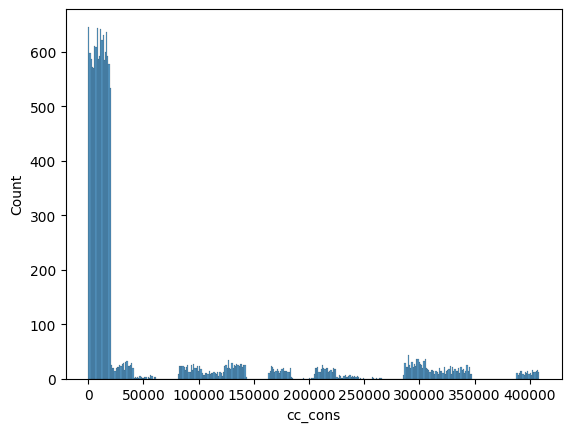

In [24]:
sns.histplot(y)

<Axes: xlabel='cc_cons', ylabel='Count'>

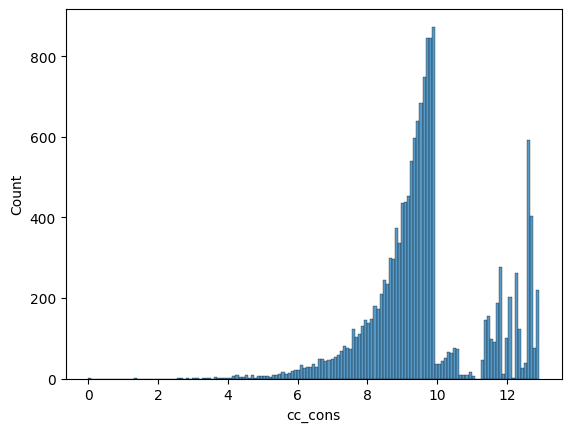

In [25]:
y_log = np.log1p(y) ## Harus di transform dulu karena data sangat skewed
sns.histplot(y_log)

### Normalisasi Data

In [26]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()
x = pd.DataFrame(scale.fit_transform(x), columns = x.columns)

In [27]:
x.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,gender,account_type,Income
0,0.859312,-0.433587,0.104093,1.866021,0.857118,1.299086,-0.205128,0.085714,-0.490196,1.782609,...,-0.291233,-0.25,0.395349,-0.8,0.226667,-1.0,0.6,0.0,0.0,0.0
1,0.509149,-0.393094,0.782196,-0.468905,-0.216878,-0.391409,-0.205128,-0.457143,-0.431373,-0.173913,...,1.161328,-0.25,0.395349,0.0,-0.944000,-1.0,0.3,0.0,0.0,1.0
2,-0.271194,-0.164931,-0.439455,0.017068,1.538893,0.295079,0.846154,0.257143,0.980392,-0.130435,...,2.026866,0.75,1.131783,-0.8,0.477333,0.0,-0.8,0.0,0.0,0.0
3,1.188595,-0.358052,0.255718,0.809491,0.966489,1.654640,1.102564,-0.571429,0.294118,-0.260870,...,-0.052287,-0.55,-0.418605,0.0,0.650667,0.0,-0.7,1.0,0.0,0.0
4,-0.468337,-0.311130,0.736990,-0.422494,0.447499,-0.432601,-0.102564,-0.457143,0.470588,0.782609,...,0.137079,-0.55,-0.387597,-0.6,0.693333,0.0,0.0,0.0,0.0,0.0


## Split Data

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(11996, 46)
(2999, 46)


## Feature Selection

Dari univariate analysis keliatannya ada feature yang constant dimana isinya imbalance sehingga kita akan check 
column apa yang constant dan akan hapus column tersebut

#### Remove Quasi - Constant Features

In [29]:
from sklearn.feature_selection import VarianceThreshold

thresh = VarianceThreshold(threshold = 0.01)

thresh.fit(x_train)

[i for i in x_train.columns if i not in x_train.columns[thresh.get_support()]]

['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed']

In [30]:
x_train = thresh.transform(x_train)
x_test = thresh.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(11996, 42)
(2999, 42)


In [31]:
data = x
data = data.drop(columns = ['personal_loan_active', 'vehicle_loan_active', 
                     'personal_loan_closed', 'vehicle_loan_closed'], axis = 1)

In [32]:
data.columns.nunique()

42

In [33]:
x_train = pd.DataFrame(x_train, columns = data.columns)
x_test = pd.DataFrame(x_test, columns = data.columns)

print(x_train.shape)
print(x_test.shape)

(11996, 42)
(2999, 42)


## Modelling

In [34]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

def RMSPE(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=0, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=0),
    "MLP": MLPRegressor(hidden_layer_sizes=(32, 16, 8), max_iter=100, random_state=0)
}

In [37]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    rmspe = RMSPE(y_test, y_pred)

    results[name] = {
        "R²": r2,
        "MSE": mse,
        "MAE": mae,
        "RMSPE (%)": rmspe
    }

results_df = pd.DataFrame(results).T
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5929
[LightGBM] [Info] Number of data points in the train set: 11996, number of used features: 42
[LightGBM] [Info] Start training from score 9.645715
                         R²       MSE       MAE  RMSPE (%)
Linear Regression -0.001071  2.527713  1.143574  19.860254
KNN               -0.199456  3.028637  1.335607  21.421378
Decision Tree     -1.256889  5.698666  1.825339  27.816426
Random Forest     -0.020186  2.575979  1.167519  20.003701
XGBoost           -0.153419  2.912395  1.303432  20.849624
LightGBM          -0.019774  2.574939  1.169585  19.960459
MLP               -0.182309  2.985342  1.306133  21.271104


/Users/jowillg/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(x_train, y_train)
print("Baseline R²:", dummy.score(x_test, y_test))

Baseline R²: -9.491226000246655e-06


Dari hasil training berbagai model diatas, hasil R^2 semua model adalah negatif sehingga saya menggunakan DummyRegressor sebagai baseline dari model. Dapat dilihat bahwa tidak ada model yang nilai R^2 nya diatas DummyRegressor mengartikan bahwa semua model belom bisa menangkap pola data

In [39]:
x_train_df = pd.DataFrame(x_train, columns=data.columns)
y_train_series = pd.Series(y_train, name="target")

corr = pd.concat([x_train_df, y_train_series], axis=1).corr()

print(corr["target"].sort_values(ascending=False))

target                          1.000000
dc_count_apr                    0.031002
debit_count_apr                 0.024051
investment_1                    0.017991
max_credit_amount_apr           0.017095
cc_cons_may                     0.015430
dc_cons_may                     0.013467
Avg_days_between_transaction    0.013230
dc_count_jun                    0.011699
credit_amount_jun               0.011421
debit_count_may                 0.009960
debit_amount_apr                0.008077
age                             0.007145
card_lim                        0.006800
dc_cons_jun                     0.006769
Emp_Tenure_Years                0.006447
cc_count_jun                    0.005271
dc_cons_apr                     0.003943
dc_count_may                    0.003597
account_type                    0.002600
investment_4                    0.001390
credit_count_may                0.000146
Tenure_with_Bank               -0.000173
NetBanking_Flag                -0.001256
gender          

Dapat dilihat nilai korelasi Pearson antara target variabel dengan variabel lainnya bahwa semuanya mendekati 0 sehingga dapat dikatakan bahwa fitur - fiturnya kurang informatif

In [40]:
from sklearn.feature_selection import mutual_info_regression

x_train_df = pd.DataFrame(x_train, columns=data.columns)
y_train_series = pd.Series(y_train, name="target")

mi = mutual_info_regression(x_train_df, y_train_series, random_state=42)

mi_scores = pd.Series(mi, index=x_train_df.columns).sort_values(ascending=False)
print(mi_scores)


Tenure_with_Bank                0.018244
investment_1                    0.014810
credit_amount_jun               0.013787
dc_count_may                    0.012294
dc_cons_apr                     0.009456
dc_cons_may                     0.008860
investment_3                    0.008858
max_credit_amount_jun           0.006428
credit_count_may                0.003302
dc_cons_jun                     0.002602
debit_count_apr                 0.002445
credit_amount_may               0.002010
NetBanking_Flag                 0.001973
card_lim                        0.001512
gender                          0.000928
cc_cons_apr                     0.000308
cc_count_may                    0.000280
age                             0.000196
debit_count_jun                 0.000195
max_credit_amount_apr           0.000114
credit_count_apr                0.000000
credit_amount_apr               0.000000
account_type                    0.000000
cc_cons_may                     0.000000
Avg_days_between